# Import Library

In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [74]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mufidatuln/Proyek-Sistem-Rekomendasi-Amazone-Product/main/dataset/amazon.csv')

# Univariate Eksploratory Data Analyst

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [76]:
dataset.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [77]:
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Cek Missing Value

In [78]:
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Mengecek missing value dengan methode `.isnull()` untuk mengetahui berapa banyak jumlah *missing value* di setiap kolom. Dari hasil di atas dapat diketahui bahwa terdapat 2 nilai pada rating_count yang bernilai NaN.

In [79]:
dataset[dataset['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [80]:
dataset.dropna(subset=['rating_count'], inplace=True)
print(dataset.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Melakukan pembersihan missing value dengan methode *dropna()*

In [81]:
dataset.duplicated().sum()

0

Mengecek apakah terdapat data yang duplikat dengan method *duplicated()*. Pada data tersebut tidak ditemukan data duplikat.

## Mengubah Format Type Data

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

Untuk memudahkan proses tokenizer dan modeling diperlukan transformasi tipe data dari object ke tipe data float

In [83]:
dataset['discounted_price'] = dataset['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
dataset['actual_price'] = dataset['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
dataset['discount_percentage'] = dataset['discount_percentage'].astype(str).str.replace('%','').astype(float)/100
dataset['rating_count'] = dataset['rating_count'].astype(str).str.replace(',', '').astype(float)

In [84]:
unique_values = dataset['rating'].unique()
print(unique_values)

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


Terdapat nilai rating yang tidak sesuai dengan format yaitu '|' sehingga diperlukan pembersihan data lebih lanjut

In [85]:
dataset['rating'] = pd.to_numeric(dataset['rating'], errors='coerce')

method .`to_numeric()` mengubah type data menjadi numerik dengan parameter `errors='coerce'` untuk mengembalikan nilai NaN jika format tidak sesuai. Sehingga nilai '|' pada data berubah menjadi nilai NaN.

In [86]:
dataset = dataset.dropna()
print(dataset.isnull().sum())
print(dataset.info())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-

Membersihkan Kembali Data

In [87]:
dataset['sub_category'] = dataset['category'].astype(str).str.split('|').str[-1]
dataset['main_category'] = dataset['category'].astype(str).str.split('|').str[0]

<ipython-input-87-00d35e13e8a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sub_category'] = dataset['category'].astype(str).str.split('|').str[-1]


Membuat Kolom/Fitur yaitu `sub_category` dan `main_category` untuk memisahkan dan menjadikan kategori lebih sepesifik dengan mengambil data dari fitur `category`.

# Visualisasi Data

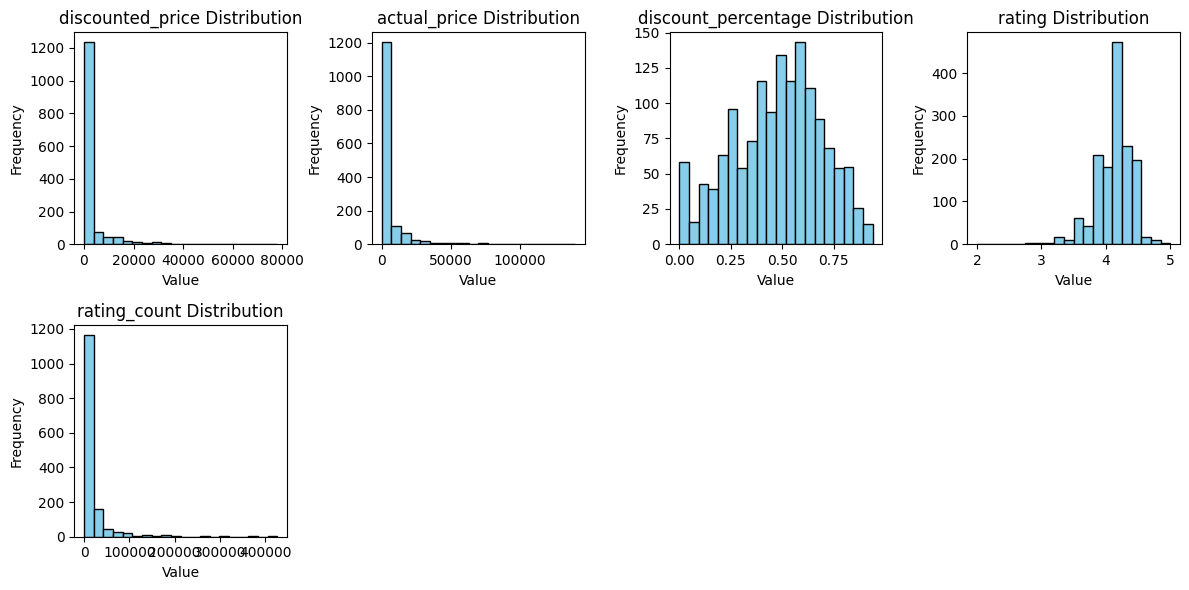

In [88]:
# Filter kolom-kolom numerik
numeric_cols = dataset.select_dtypes(include=['float', 'int']).columns
data = dataset[numeric_cols]
# Inisialisasi figure dan axes untuk subplot
fig, axs = plt.subplots(2, 4, figsize=(12, 6))  # Membuat grid subplot dengan 2 baris dan 4 kolom

# Flatten axes agar mudah diakses
axs = axs.flatten()

# Loop melalui setiap fitur dan plot data pada subplot yang sesuai
for i, feature in enumerate(data.columns):
    ax = axs[i]
    ax.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Menghapus subplot yang tidak digunakan
for i in range(len(data.columns), len(axs)):
    fig.delaxes(axs[i])

# Mengatur layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

Berikut adalah visualisasi persebaran data numeric dari dataset produk amazone. Dapat dilihat pada fitur `discount_price`, `actual_price` dan `rating_count` memiliki distribusi data miring ke kanan.

Sedangka untuk fitur `discount_presentage` dan `rating` memilki distribusi hampir simetris

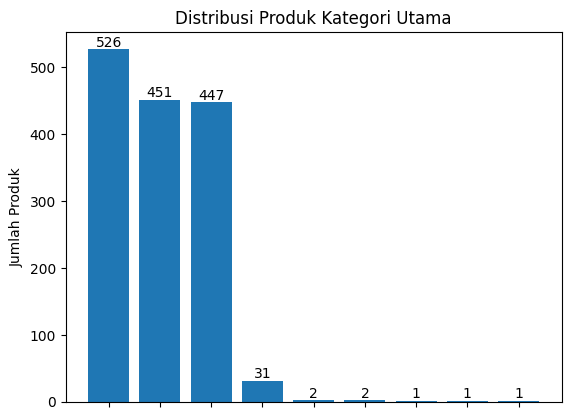

Top 10 Kategori Utama
       Kategori Utama  Jumlah Produk
          Electronics            526
Computers&Accessories            451
         Home&Kitchen            447
       OfficeProducts             31
   MusicalInstruments              2
      HomeImprovement              2
           Toys&Games              1
        Car&Motorbike              1
  Health&PersonalCare              1


In [89]:
# Data
main_category_counts = dataset['main_category'].value_counts()[:11]

# Plot bar
plt.bar(range(len(main_category_counts)), main_category_counts.values)

# Tambahkan nilai di atas bar
for i, value in enumerate(main_category_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Label dan judul
plt.ylabel('Jumlah Produk')
plt.title('Distribusi Produk Kategori Utama')

# Hilangkan label sumbu x
plt.xticks(range(len(main_category_counts)), '')

# Tampilkan plot
plt.show()

# Top 10 main categories
top_main_categories = pd.DataFrame({'Kategori Utama': main_category_counts.index, 'Jumlah Produk': main_category_counts.values})
print('Top 10 Kategori Utama')
print(top_main_categories.to_string(index=False))

Berdasarkan hasil tersebut dapat disimpulkan bahwa tiga kategori utama teratas adalah Elektronik, Komputer & Aksesori, dan Rumah & Dapur. Hal ini menunjukkan bahwa kategori-kategori ini populer di kalangan pelanggan. Jumlah produk dalam kategori utama lainnya cukup rendah, yang menunjukkan bahwa kategori-kategori ini tidak sepopuler tiga kategori teratas.

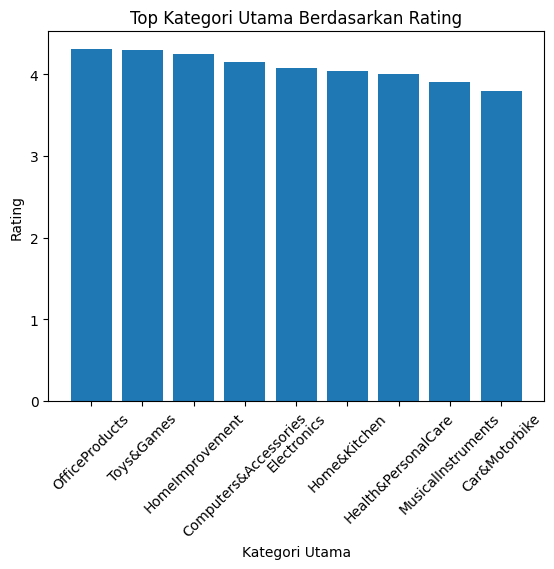

,Kategori Utama,Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.155654
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


In [90]:
# Menghitung Top Main Kategori
top = dataset.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('Kategori Utama')
plt.ylabel('Rating')
plt.title('Top Kategori Utama Berdasarkan Rating')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()
ranking = dataset.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
ranking_tabel = pd.DataFrame({'Kategori Utama' : ranking['main_category'], 'Rating' : ranking['rating']})
ranking_tabel

Dengan melihat tabel ini, kita dapat melihat kategori utama yang diperingkat berdasarkan peringkat rata-rata. Kategori utama dengan peringkat tertinggi adalah Produk Kantor, Mainan & Permainan, dan Perbaikan Rumah, dengan peringkat di atas 4,0. Hal ini menunjukkan bahwa pelanggan pada umumnya puas dengan produk yang ditawarkan dalam kategori-kategori ini.



Intinya, sistem rekomendasi berbasis konten adalah sistem yang memanfaatkan rekomendasi pengguna yang berasal dari deskripsi barang. Sistem berbasis konten beroperasi berdasarkan premis bahwa jika pengguna telah merespons dengan baik terhadap barang dengan karakteristik tertentu, dia harus memiliki minat terhadap hal-hal yang sebanding dan dikatakan memiliki karakteristik yang sama. Cara yang paling populer untuk mengkarakterisasi fitur suatu barang adalah dengan kata kunci dan bobotnya, yang menunjukkan seberapa penting kata kunci tersebut bagi deskripsi barang.

Untuk menghitung kemiripan, digunakan rumus berikut ini.


# Data Preparosessing

In [91]:
dataset['product_details'] = dataset['product_name']  + ' ' + dataset['about_product'] + ' ' + dataset['review_content']
dataset['product_details'] = dataset['product_details'].fillna('')
dataset['product_details']

0       Wayona Nylon Braided USB to Lightning Fast Cha...
1       Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2       Sounce Fast Phone Charging Cable & Data Sync U...
3       boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4       Portronics Konnect L 1.2M Fast Charging 3A 8 P...
                              ...                        
1460    Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
1461    Prestige Delight PRWO Electric Rice Cooker (1 ...
1462    Bajaj Majesty RX10 2000 Watts Heat Convector R...
1463    Havells Ventil Air DSP 230mm Exhaust Fan (Pist...
1464    Borosil Jumbo 1000-Watt Grill Sandwich Maker (...
Name: product_details, Length: 1462, dtype: object

Membuat kolom baru yaitu `produk_details` yang berisi beberapa kolom/fitur yaitu `product_name`, `about_product` dan `reviwe_product`

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english',max_df=0.95,min_df=2,ngram_range=(1,1))
tfidf_matrix = tfidf_vec.fit_transform(dataset['product_details'])
tfidf_matrix

<1462x10088 sparse matrix of type '<class 'numpy.float64'>'
	with 210405 stored elements in Compressed Sparse Row format>

Pada tahap ini dilakukan untuk mengubah teks menjadi vektor dengan fitur TF-IDF. Pada hal ini menerapkan `fit_transform` pada teks yang diberikan dalam dataset. `fit_transform` akan menghitung TF-IDF untuk setiap kata dalam teks dan menghasilkan matriks yang berisi nilai TF-IDF untuk setiap kata dalam setiap dokumen.

Hasil dari proses vektorisasi disimpan dalam variabel `tfidf_matrix`.  Hasilnya adalah matriks yang berisi representasi numerik dari teks dalam dataset, di mana setiap baris mewakili satu dokumen dan setiap kolom mewakili kata tertentu dalam kumpulan data.

In [93]:
tfidf_matrix.shape

(1462, 10088)

# Conten Based Recommendations

##Modeling

In [94]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
sim_score = 0

def content_based_recommendations(product_id, data, cosine_sim, n=5):
    # mencari indeks (baris) dari produk yang sesuai dengan product_id dalam dataset.
    idx = data[data['product_id'] == product_id].index[0]
    # mengambil similaritas kosinus antara produk yang dipilih (idx)
    # dan semua produk lain dalam dataset.
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Similaritas kosinus diurutkan secara menurun dan hanya diambil n nilai teratas.
    #Langkah ini dilakukan untuk mendapatkan produk dengan similaritas tertinggi.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    #Indeks produk yang terkait dengan similaritas teratas diambil dari sim_scores.
    product_indices = [i[0] for i in sim_scores]
    return data.iloc[product_indices], sim_scores

content_based_recommendations, p_sim_score = content_based_recommendations('B09LHXNZLR', dataset, cosine_sim)

Rekomendasi content bases ini menggunakan metode *cosine similarity*.

*Cosine similarity* adalah metrik yang digunakan untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Dalam konteks sistem rekomendasi atau pemrosesan teks, *cosine similarity* sering digunakan untuk mengukur seberapa mirip dua dokumen atau item berdasarkan representasi numerik mereka.

Dalam konteks sistem rekomendasi, *cosine similarity* sering digunakan untuk membandingkan profil pengguna dengan item-item dalam basis data untuk memberikan rekomendasi. Misalnya, dalam sistem rekomendasi berbasis konten, *cosine similarity* dapat digunakan untuk membandingkan profil preferensi pengguna dengan deskripsi atau atribut-atribut produk untuk menentukan seberapa cocok produk tersebut dengan preferensi pengguna. Semakin tinggi nilai *cosine similarity* antara profil pengguna dan produk, semakin besar kemungkinan produk tersebut direkomendasikan kepada pengguna.

In [95]:
content_based_recommendations[['product_id','product_name']]

,product_id,product_name
170,B07M69276N,TP-Link AC1300 USB WiFi Adapter (Archer T3U) -...
303,B08G43CCLC,NK STAR 950 Mbps USB WiFi Adapter Wireless Net...
56,B0088TKTY2,TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...
50,B07P681N66,TP-Link AC600 600 Mbps WiFi Wireless Network U...
894,B07P681N66,TP-Link AC600 600 Mbps WiFi Wireless Network U...


Pemanggilan `content_based_recommendations` dengan argumen 'B09LHXNZLR' pada dataset dan matriks cosine similarity (cosine_sim) menghasilkan daftar produk yang direkomendasikan berdasarkan produk dengan ID 'B09LHXNZLR'.

## Evaluasi

In [96]:
# finding ground truth score using ratings
recommended_product_ids = content_based_recommendations['product_id'].tolist()
ratings_for_recommended_items = dataset[dataset['product_id'].isin(recommended_product_ids)]

# Define a threshold for considering an item as relevant (e.g., 4 or 5 stars)
threshold = 4

# Assign binary relevance labels based on the threshold
ground_truth = [1 if rating >= threshold else 0 for rating in ratings_for_recommended_items['rating']]

predicted_scores = [tup[1] for tup in p_sim_score]
print("Predicted Relevance Scores:", predicted_scores)


Predicted Relevance Scores: [0.46064225477676984, 0.4237123803319739, 0.3904775018407861, 0.379996859708429, 0.379996859708429]


Program tersebut bertujuan untuk mengevaluasi seberapa baik sistem rekomendasi berbasis konten dapat memprediksi item yang relevan untuk pengguna.

1. Mencari Skor Ground Truth menggunakan Rating:

* Sistem merekomendasikan beberapa produk kepada pengguna.
* Seberapa relevan produk-produk tersebut berdasarkan rating yang diberikan oleh pengguna.

2. Menetapkan Batas untuk Mempertimbangkan Item yang Relevan:

* batas minimal rating yang akan dianggap sebagai produk yang relevan, misalnya, rating 4 atau 5 bintang.

3.  Menetapkan Label Relevansi Biner berdasarkan Ambang Batas:

* Setiap produk yang direkomendasikan diberi label 1 jika ratingnya melewati batas relevansi yang telah ditetapkan, atau 0 jika ratingnya di bawah batas tersebut.

4. Mendapatkan Skor Prediksi:

* Dari hasil rekomendasi, diperoleh skor similaritas antara produk yang direkomendasikan dan produk yang telah dipilih sebelumnya oleh pengguna.
5. Mencetak Skor Relevansi yang Diprediksi:
* Mencetak skor similaritas tersebut untuk melihat seberapa dekat produk yang direkomendasikan dengan preferensi pengguna.


Tujuan akhirnya adalah untuk melihat seberapa baik sistem rekomendasi kita dapat memprediksi preferensi pengguna dengan menganalisis skor relevansi yang diprediksi dengan skor relevansi sebenarnya berdasarkan rating yang diberikan pengguna.

In [97]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(ground_truth, predicted_scores)
print("Average Precision (AP):", ap)

Average Precision (AP): 1.0



Evaluasi yang dilakukan dalam proyek ini adalah metrik *Average Precision* (AP)

* Fungsi `average_precision_score` dijalankan dengan dua argumen:
1. `ground_truth`: Ini adalah daftar label biner yang menunjukkan relevansi sebenarnya dari setiap item yang direkomendasikan. Label ini telah ditetapkan sebelumnya berdasarkan rating yang diberikan oleh pengguna.
2. `predicted_scores`: Ini adalah skor prediksi yang menunjukkan seberapa relevan setiap item yang direkomendasikan menurut sistem. Skor ini diperoleh dari metode *cosine similarity* yang digunakan untuk merekomendasikan item.

*Average precision* memberikan gambaran tentang seberapa baik sistem rekomendasi mampu mengurutkan item yang relevan di atas yang tidak relevan. Semakin tinggi nilai a*verage precision*, semakin baik kualitas rekomendasi sistem tersebut. Nilai *average precision* berkisar antara 0 hingga 1, dengan nilai 1 menunjukkan kualitas rekomendasi yang sempurna.

Pada proyek ini *Avarage precision* memperoleh nilai 1 ynag artinya menuntukan kualitas rekomendasi yang baik.

# Collaborative Filtering Recommendations

In [98]:
!pip install surprise

*Collaborative filtering* adalah metode yang digunakan dalam sistem rekomendasi untuk menghasilkan rekomendasi kepada pengguna berdasarkan penilaian (rating) atau perilaku pengguna serta kesamaan atau perbandingan dengan pengguna lain. Dalam *collaborative filtering*, rekomendasi dibuat berdasarkan pola hubungan antara pengguna dan item yang diamati dari data *riil*.

Keuntungan *collaborative filtering* adalah kemampuannya untuk merekomendasikan item yang tidak terikat oleh deskripsi atau atribut tertentu dari item, tetapi didasarkan pada pola perilaku pengguna yang sebenarnya. Namun, kerugiannya adalah ketika data penilaian pengguna sangat langka atau ketika terjadi masalah keamanan privasi, seperti masalah identifikasi pengguna, yang dapat membatasi efektivitas metode ini.

## Data Preprosessing

In [99]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['user_id', 'product_id', 'rating']], reader)

# Membagi dataset menjadi set latih dan set uji
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Dataset dipilih dari beberapa fitur yang diberikan, hanya memilih fitur `user_id`, `product_id`, dan `rating`.
Dataset kemudian dibagi menjadi set pelatihan (trainset) dan set pengujian (testset) menggunakan *train_test_split*.

## Modeling

In [100]:
# Membangun dan melatih model collaborative filtering user-based
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Membuat Prediksi
predictions = model.test(testset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


## Evaluasi

In [101]:
# Evaluasi model
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.2636
MAE:  0.1829


0.18286800363193648

In [102]:
predictions[0:3]

[Prediction(uid='AHH26HAPTOI5Z52DFLNYU5TOLWCQ,AFIPAA4KT36MSZTCVAITRIUVJCNQ,AEYXCHSBU6NC4ZKH4OOFYZZTQJFA,AG4CH37VZG5JRJCAEYYGYTFH5UWQ,AGGCXXWA7CJVTHA22YE7PTNWQ7NQ,AFNQO7B5IZKARACZBIO74VFTU6EA,AH3ABVXQTD6ZA64V6NTEJL66RV7A,AFKY3NTT4T35K67VJ2RIO76YDK2Q', iid='B08M66K48D', r_ui=4.3, est=4.097091531223268, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AH2OGGTXFZ6MSSCZB7IRRZPFOJLA,AFV6NBHT64FRQA3KRITDIU3M7NNA,AHIKT4WX23GNGZCH5KEHHVFYZYMQ,AGQXGHRFNHL3Q7C3YGA7SESRJBRQ,AHHURWLAWRA76F6ZD3SQ2LZ5PYVA,AFI3GFCFBOM4G6QGUKQKOZYO4BGQ,AFF57GWUKTC6BV7TNG2LEFWDVRQA,AGJBCJZIXDHRCB2E2W6LKVZRPKTQ', iid='B08MCD9JFY', r_ui=3.8, est=4.097091531223268, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AEYYS445R5U3OMTCXTPFPPYIOC3A,AGRJV53VRADLDOF7VTZ75QXG7Q6Q,AFRZUJVTEHFZOVRCJJMAZTI5343A,AHPGEGRJETCIIA5N5UHXPPK7ZW3A,AGUWLDNMRBUVBQTRLDFJOU7B67WQ,AGZE52HWESBYEHQE7ZWVG6MIUTBA,AHC4U7CH7PGMKPLM3K6T36QSLJBA,AFNISIS3SIIIMSYAPMEAXN

Model memperkirakan peringkat untuk pengguna 'AHH26HAPTOI5Z52DFLNYU5TOLWCQ' untuk item 'B08M66K48D' sekitar 4,097. Namun, peringkat yang sebenarnya ('r_ui') adalah 4,3.

Demikian pula, untuk prediksi kedua dan ketiga, model memperkirakan peringkat untuk pengguna dan item yang sesuai sekitar 4,097, tetapi peringkat sebenarnya masing-masing adalah 3,8 dan 4,0.